<a href="https://colab.research.google.com/github/cd-public/D505/blob/master/ipynb/temperature_prod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Input features (temperature in Celsius)
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
x = torch.tensor(t_c).view(-1, 1)  # Reshape to a 2D tensor with 11 rows and 1 column

# Target values (temperature in Fahrenheit)
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
y = torch.tensor(t_u).view(-1, 1)  # Reshape to a 2D tensor with 11 rows and 1 column

In [ ]:
import rpy2

In [ ]:
%load_ext rpy2.ipython

In [11]:
%%R
c(1,2)

[1] 1 2


In [12]:
%%R -i t_u
t_u

 [1] 35.7 55.9 58.2 81.9 56.3 48.9 33.9 21.8 48.4 60.4 68.4


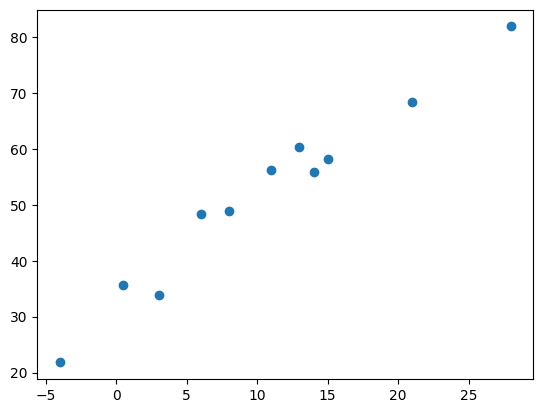

In [ ]:
plt.scatter(t_c, t_u);

In [ ]:
# Data normalization
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_normalized = scaler_x.fit_transform(x.float())
y_normalized = scaler_y.fit_transform(y.float())

In [ ]:
class LinearNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearNet, self).__init__()
        self.lin_coeffs = nn.Linear(input_size, output_size)


    def forward(self, x):
        x = self.lin_coeffs(x)
        return x


# Define a simple linear regression model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input feature, one output

    def forward(self, x):
        return self.linear(x)

In [ ]:
# Instantiate the linear regression model, loss function, and optimizer
model = LinearNet(1,1)
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass: compute predicted y by passing x to the model
    y_pred = model(torch.tensor(x_normalized, dtype=torch.float32))

    # Compute and print loss
    loss = criterion(y_pred, torch.tensor(y_normalized, dtype=torch.float32))
    if epoch % 100 == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss.item()}')
        print(model.state_dict())

    # Zero gradients, perform a backward pass, and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# After training, print the final model parameters
print(f'Final Model Parameters: {model.state_dict()}')

Epoch 1, Loss: 0.5702587366104126
OrderedDict({'lin_coeffs.weight': tensor([[0.3118]]), 'lin_coeffs.bias': tensor([-0.2911])})
Epoch 101, Loss: 0.3946257531642914
OrderedDict({'lin_coeffs.weight': tensor([[0.4332]]), 'lin_coeffs.bias': tensor([-0.2383])})
Epoch 201, Loss: 0.2769426107406616
OrderedDict({'lin_coeffs.weight': tensor([[0.5326]]), 'lin_coeffs.bias': tensor([-0.1951])})
Epoch 301, Loss: 0.19808879494667053
OrderedDict({'lin_coeffs.weight': tensor([[0.6139]]), 'lin_coeffs.bias': tensor([-0.1597])})
Epoch 401, Loss: 0.14525264501571655
OrderedDict({'lin_coeffs.weight': tensor([[0.6805]]), 'lin_coeffs.bias': tensor([-0.1307])})
Epoch 501, Loss: 0.10984975844621658
OrderedDict({'lin_coeffs.weight': tensor([[0.7350]]), 'lin_coeffs.bias': tensor([-0.1070])})
Epoch 601, Loss: 0.086127869784832
OrderedDict({'lin_coeffs.weight': tensor([[0.7796]]), 'lin_coeffs.bias': tensor([-0.0876])})
Epoch 701, Loss: 0.07023297995328903
OrderedDict({'lin_coeffs.weight': tensor([[0.8161]]), 'lin_c

In [ ]:
scaler_y.scale_

array([16.04861968])

In [ ]:
8.78*0.9369

8.225981999999998

### Penguins



In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
penguins = sns.load_dataset("penguins")

penguins = penguins.dropna()

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [ ]:
penguins.shape

(333, 7)

In [ ]:
label_encoder = LabelEncoder()
penguins['species_encoded'] = label_encoder.fit_transform(penguins['species'])

In [ ]:
class PenguinDataset(Dataset):
    def __init__(self, data):
        self.X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values
        self.y = data['species_encoded'].values # DONT FORGET .VALUES
        self.n_samples = len(data)

    def __getitem__(self, index):
        return torch.tensor(self.X[index], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.int64)

    def __len__(self):
        return self.n_samples

In [ ]:
train_data, test_data = train_test_split(penguins, test_size=0.2, random_state=97301)

train_dataset = PenguinDataset(train_data)
test_dataset = PenguinDataset(test_data)

train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

In [ ]:
train_dataset.__getitem__(5)

(tensor([  36.7000,   19.3000,  193.0000, 3450.0000]), tensor(0))

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [ ]:
input_size = 4  # Number of features
hidden_size = 64  # Size of the hidden layer
num_classes = len(label_encoder.classes_)
learning_rate = 0.001

In [ ]:
num_classes

3

In [ ]:
model = SimpleNN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/10, Loss: 228.2781
Epoch 2/10, Loss: 55.7716
Epoch 3/10, Loss: 12.1236
Epoch 4/10, Loss: 11.2677
Epoch 5/10, Loss: 13.5864
Epoch 6/10, Loss: 19.9442
Epoch 7/10, Loss: 11.2570
Epoch 8/10, Loss: 7.8737
Epoch 9/10, Loss: 10.6387
Epoch 10/10, Loss: 9.4042


In [ ]:
# Evaluation on the test set
model.eval()
correct = 0
total = 0

# might be worth picking this apart line by line...
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = correct / total
print(f"Accuracy on test set: {accuracy:.2%}")

Accuracy on test set: 40.30%


Well that was awful. Before we fix it...

In [ ]:
num_batches_to_iterate = 3  # Specify the number of batches you want to iterate through

with torch.no_grad():
    for batch_idx, batch in enumerate(test_loader):
        if batch_idx >= num_batches_to_iterate:
            break
        outputs = model(inputs)
        print(inputs)
        print(outputs)
        _, predicted = torch.max(outputs.data, 1)
        print(predicted)
        print('\n\n\n')

tensor([[  35.5000,   16.2000,  195.0000, 3350.0000],
        [  34.0000,   17.1000,  185.0000, 3400.0000],
        [  49.2000,   15.2000,  221.0000, 6300.0000]])
tensor([[ -67.1173,  -90.4139,  -67.3528],
        [ -69.9982,  -89.7457,  -68.4247],
        [-142.3762, -149.5948, -130.5651]])
tensor([0, 2, 2])




tensor([[  35.5000,   16.2000,  195.0000, 3350.0000],
        [  34.0000,   17.1000,  185.0000, 3400.0000],
        [  49.2000,   15.2000,  221.0000, 6300.0000]])
tensor([[ -67.1173,  -90.4139,  -67.3528],
        [ -69.9982,  -89.7457,  -68.4247],
        [-142.3762, -149.5948, -130.5651]])
tensor([0, 2, 2])




tensor([[  35.5000,   16.2000,  195.0000, 3350.0000],
        [  34.0000,   17.1000,  185.0000, 3400.0000],
        [  49.2000,   15.2000,  221.0000, 6300.0000]])
tensor([[ -67.1173,  -90.4139,  -67.3528],
        [ -69.9982,  -89.7457,  -68.4247],
        [-142.3762, -149.5948, -130.5651]])
tensor([0, 2, 2])






In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = scaled_features


In [ ]:
train_data, test_data = train_test_split(penguins, test_size=0.2, random_state=12345)

train_dataset = PenguinDataset(train_data)
test_dataset = PenguinDataset(test_data)

train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)


model = SimpleNN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/10, Loss: 1.0188
Epoch 2/10, Loss: 0.7699
Epoch 3/10, Loss: 0.5856
Epoch 4/10, Loss: 0.4568
Epoch 5/10, Loss: 0.3622
Epoch 6/10, Loss: 0.2978
Epoch 7/10, Loss: 0.2449
Epoch 8/10, Loss: 0.2129
Epoch 9/10, Loss: 0.1787
Epoch 10/10, Loss: 0.1548


In [ ]:
# Evaluation on the test set
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = correct / total
print(f"Accuracy on test set: {accuracy:.2%}")

Accuracy on test set: 98.51%


How striking!

### Exercise: the titanic

In [ ]:

# Load the Titanic dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic_df = pd.read_csv(url)

# Drop rows with missing values for simplicity
titanic_df = titanic_df.dropna()

In [ ]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


#### Your exercise:

Create a neural network as above to model survival on the titanic dataset. There are several ways to do this. Here are some suggestions:
* change the size of the output layer (a simple probability, so 1)
* change the output of the final hidden layer to be a probability using nn.Sigmoid()
* change the loss criterion to be nn.BCELoss()

Please note that you can do this all differently: use 2 outputs (one per class), omit sigmoid and keep the same loss function, but the difference might be instructive.

* also: explore variations of the model architecture (multiple hidden layers? hidden layer size? etc.) and see how far you can push the model performance!

I encourage you to print out lots of intermediate things (your tensors? what is in your data loader? model parameters and performance? etc.)! I learned a lot doing it and I bet you will too.

#### One solution:

In [ ]:
# Select relevant features and target
features = ['Pclass', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']
target = 'Survived'

# Standard scale the features
scaler = StandardScaler()
titanic_df[features] = scaler.fit_transform(titanic_df[features])

In [ ]:
# Define a custom PyTorch dataset
class TitanicDataset(Dataset):
    def __init__(self, data):
        self.X = data[features].values
        self.y = data[target].values
        self.n_samples = len(data)

    def __getitem__(self, index):
        return torch.tensor(self.X[index], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.float32)

    def __len__(self):
        return self.n_samples

# Split data into train and test sets
train_data, test_data = train_test_split(titanic_df, test_size=0.2, random_state=42)

# Create PyTorch datasets and dataloaders
train_dataset = TitanicDataset(train_data)
test_dataset = TitanicDataset(test_data)

train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

In [ ]:
train_dataset.__getitem__(3)

(tensor([-0.3654, -0.1043, -0.4759, -0.4750, -0.3880]), tensor(1.))

In [ ]:
# Define a simple neural network with one hidden layer
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out



In [ ]:
# Initialize the model, loss function, and optimizer
input_size = len(features)  # Number of features
hidden_size = 64  # Size of the hidden layer
output_size = 1  # Output size (binary classification for survival)

model = SimpleNN(input_size, hidden_size, output_size)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        #print(outputs)
        #print(targets)
        #print(outputs.squeeze())
        #print(outputs.shape)
        #print(outputs.squeeze().shape)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/10, Loss: 0.6951
Epoch 2/10, Loss: 0.6876
Epoch 3/10, Loss: 0.6796
Epoch 4/10, Loss: 0.6744
Epoch 5/10, Loss: 0.6680
Epoch 6/10, Loss: 0.6640
Epoch 7/10, Loss: 0.6585
Epoch 8/10, Loss: 0.6548
Epoch 9/10, Loss: 0.6514
Epoch 10/10, Loss: 0.6480


In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        predicted = torch.round(outputs)
        total += targets.size(0)
        correct += (predicted == targets.unsqueeze(1)).sum().item()  # Ensure targets are 2D

accuracy = correct / total
print(f"Accuracy on test set: {accuracy:.2%}")


Accuracy on test set: 66.85%
